C:\Users\diogo\AppData\Local\Temp\ipykernel_18124\3094644163.py:106: RuntimeWarning: divide by zero encountered in divide
  RR = r *xi_s / theta
C:\Users\diogo\AppData\Local\Temp\ipykernel_18124\3094644163.py:119: RuntimeWarning: divide by zero encountered in power
  F2 = (1-F1)/(1+ 8.94E15*(X/(4-3*X))*(T6)**(-1/6)*np.exp(-102.65*T6**(-1/3)))
C:\Users\diogo\AppData\Local\Temp\ipykernel_18124\3094644163.py:119: RuntimeWarning: invalid value encountered in multiply
  F2 = (1-F1)/(1+ 8.94E15*(X/(4-3*X))*(T6)**(-1/6)*np.exp(-102.65*T6**(-1/3)))
C:\Users\diogo\AppData\Local\Temp\ipykernel_18124\3094644163.py:125: RuntimeWarning: divide by zero encountered in power
  e0 = 2.38E6 * X**2 * rho * T6**(-2/3) * (1 + 0.0123*T6**(1/3) + 0.0109 * T6**(2/3) + 0.00095*T6 )*np.exp(-33.80*T6**(-1/3) + 0.27 * rho**(1/2)*T6**(-3/2))
C:\Users\diogo\AppData\Local\Temp\ipykernel_18124\3094644163.py:125: RuntimeWarning: invalid value encountered in multiply
  e0 = 2.38E6 * X**2 * rho * T6**(-2/3) * (1 + 0.012

[2.73353107 2.58568513 2.57690813 2.661618   2.68661186 2.66207101
 2.66106126 2.7090798  2.60911614 2.61229655 2.52072076 2.58921408
 2.66793328 2.61050369 2.59905782 2.66227807 2.73714548 2.67790829
 2.66737042 2.6567046  2.66936247 2.59049585 2.59020788 2.57774562
 2.63844855 2.71523341 2.61012399 2.72027139 2.605947   2.55532127
 2.69773785 2.67386812 2.70526887 2.64374582 2.67470245 2.64564578
 2.63288389 2.59898552 2.70856405 2.66414123 2.72201655 2.57719729
 2.64350804 2.61704216 2.6326929  2.62031635 2.68255615 2.64338497
 2.62233369 2.64169996 2.58730974 2.68922013 2.56170621 2.61939597
 2.57379416 2.5885741  2.58370419 2.61874418 2.66889969 2.63175709
 2.59087759 2.56673086 2.6028243  2.70073274 2.65085393 2.64736138
 2.65845581 2.66210607 2.63755277 2.66339369 2.62030158 2.59290559
 2.73111813 2.56592916 2.5363092  2.67559125 2.59127977 2.58523353
 2.65390409 2.63073283 2.57285095 2.63769237 2.5698856  2.76612611
 2.63557243 2.59255425 2.6783223  2.58258039 2.61333424 2.6614

(array([ 33., 193., 384., 294.,  89.,   7.]),
 array([2.48038488, 2.53725296, 2.59412104, 2.65098912, 2.7078572 ,
        2.76472528, 2.82159336]),
 <BarContainer object of 6 artists>)

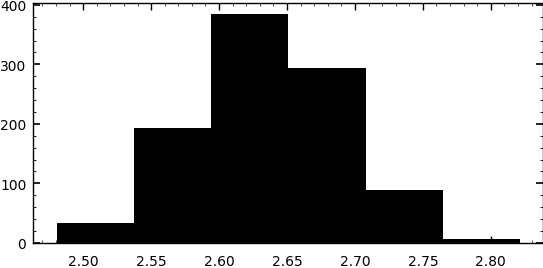

In [40]:
Msol = 1.988475E33
Rsol = 6.957E10
Xsol = 0.74
Zsol = 0.02
nsol = 3.17
G = 6.67408E-8
Rb = 8.314511E7
Lsol = 3.828E33

Mestrela = 1.08*Msol
Restrela = 1.810*Rsol
Lestrela = 3.57*Lsol

Lestrela = 0.34*Lsol
Lerr = 0.01*Lsol
Restrela = 0.735*Rsol
Rerr = 0.005*Rsol
Mestrela = 0.82*Msol
Merr = 0.02*Msol
        
Zestrela= 0.74*Zsol

import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sc

plt.style.use('aa.mplstyle')
plt.rcParams['font.size'] = 16
#plt.rcParams['axes.titleweight'] = 'bold'
def Emissividade(n, M,R,X,Z):
    def Politropo(n, h, grafico=False):
        n=n
        ti =h

        if n==0:
            tf = np.sqrt(6)+0.5
        elif 0<n<=1:
            tf = np.pi+0.5
        elif 2<n<=3:
            tf = 7
        elif 3<n<=4:
            tf = 16
        else:
            tf = 40
            ti = h*10 
            h = h*10

        def sistema(x,y):
            dy1dx = y[1]
            if y[0] >0 :
                dy2dx = -(y[0])**n - (2*y[1])/x 
            else:
                dy2dx = -(abs(y[0])**n )- (2*y[1])/x 
            return [dy1dx,dy2dx]
        #print(tf)
        valoresx = np.arange(ti,tf,h)
        inicial = [1-(ti**2)/2,-ti]

        solution = sc.integrate.solve_ivp(sistema, [ti,tf], inicial, t_eval=valoresx)



        fni = np.where(solution.y[0] < 0)[0][0]


        m_xi_s = (solution.y[0][fni]- solution.y[0][fni-1])/(valoresx[fni]-valoresx[fni-1])
        xi_s = -(solution.y[0][fni] - m_xi_s*valoresx[fni])/m_xi_s

        xi_f = valoresx[:fni-1]
        xi_f = np.append(xi_f,xi_s)
        xi_f = np.concatenate(([0],xi_f))

        thetalinha_s = (solution.y[1][fni]- solution.y[1][fni-1])/(valoresx[fni]-valoresx[fni-1]) * (xi_s - valoresx[fni-1]) + solution.y[1][fni-1]

        theta_f = solution.y[0][:fni-1]
        theta_f = np.append(theta_f, 0)
        theta_f = np.concatenate(([1],theta_f))

        thetalinha_f = solution.y[1][:fni-1]
        thetalinha_f = np.append(thetalinha_f, thetalinha_s)
        thetalinha_f = np.concatenate(([0],thetalinha_f))

        len(xi_f) == len(theta_f) == len(thetalinha_f)
        #print(valoresx[fni-1], valoresx[fni])
        #print(valoresx[fni-1]- valoresx[fni])

        return(xi_f, theta_f, thetalinha_f)#, len(xi_f) == len(theta_f) == len(thetalinha_f))

### 
#Adicionar o primeiro valor os 3 arrays finais (0,1,0)

    poli = Politropo(n,1E-4)
    xi_s = poli[0][-1]
    #print(xi_s)
    xi = poli[0]
    theta_s = poli[1][-1]
    theta = poli[1]
    thetalinha_s = poli[2][-1]
    thetalinha = poli[2]

    rhoc = M/((4*np.pi/3)*R**3) * (-xi_s/(3*thetalinha_s))
    Pc = G*M**2/R**4 * 1/(4*np.pi*(n+1)*(thetalinha_s)**2)
    Tc = (4/(5*X-Z+3)) * G*M/(Rb *R) * 1/((n+1)*xi_s*(-thetalinha_s))
    
    r = (R / xi_s) * xi
    RR = r *xi_s / theta
    P = Pc * theta**(n+1)
    T = Tc * theta
    rho = rhoc * theta**n

    m = M/(xi_s**2 * thetalinha_s) * xi**2 * thetalinha

    T6 = T/10**6
    #print(T6)
    alpha = 1.2E17 * ((1-X-Z)/4*X)**2 * np.exp(-100 * T6**(2/3))

    F1 = (np.sqrt(alpha + 2) - np.sqrt(alpha))/(np.sqrt(alpha +2) + 3*np.sqrt(alpha))

    F2 = (1-F1)/(1+ 8.94E15*(X/(4-3*X))*(T6)**(-1/6)*np.exp(-102.65*T6**(-1/3)))

    F3 = 1 - F1 - F2

    phi = 1- alpha + np.sqrt(alpha*(alpha+2))

    e0 = 2.38E6 * X**2 * rho * T6**(-2/3) * (1 + 0.0123*T6**(1/3) + 0.0109 * T6**(2/3) + 0.00095*T6 )*np.exp(-33.80*T6**(-1/3) + 0.27 * rho**(1/2)*T6**(-3/2))

    epp = e0/0.980 * phi * (0.980*F1 + 0.960*F2 + 0.721*F3)

    ecno = 8.67E27 * Z * X * rho * T6**(-2/3) * (1 + 0.0027*T6**(1/3) - 0.00778*T6**(2/3) - 0.000149*T6)*np.exp(-152.28*T6**(-1/3))
    
    emissividade = epp  + ecno
    for ind, en  in enumerate(emissividade):
        if en < 1E-10:
            ind_inf = ind
    emissividade[ind_inf:]=0


    r_squared = 4 * np.pi * r ** 2
    rho_emissividade = rho * emissividade

    integral_value = 0  # Inicialize o valor do integral como zero
    L = []

    for rr in range(1, len(r)):  # Comece a partir de 1 para evitar rr = 0
        delta_integral = np.trapz(r_squared[rr - 1:rr + 1] * rho_emissividade[rr - 1:rr + 1], r[rr - 1:rr + 1])
        integral_value += delta_integral  # Adicione o novo valor ao integral
        L.append(integral_value)

    return(rho,P,T,m, xi, emissividade,r, 1, theta, thetalinha, RR, L)

def y(n,M,R,L,X,Z):
    fisicasol = Emissividade(n,M,R,0.74,0.02)
    din = fisicasol[4]**2 * fisicasol[8]**n * M/L * fisicasol[5]
    integr = sc.integrate.simpson(din, fisicasol[4]) 
    #print(din)
    return np.log10((1/(fisicasol[4][-1]**2 * (-fisicasol[9][-1]))) * integr)


def obter_n(y, M, R, L,X, Z):
    return sc.optimize.newton(y,3, args=(M, R,L, X, Z))
          
Nt = 1000
npoint= 3
a0=np.zeros(Nt,float)
a1=np.zeros(Nt,float)

for i in range(0,Nt):
    Mn = Mestrela + Merr*np.random.normal(0,1)
    Rn = Restrela + Rerr*np.random.normal(0,1)
    Ln = Lestrela + Lerr*np.random.normal(0,1)
    a0[i] = obter_n(y, Mn, Rn,Ln, 0.74, Zestrela)
    with open("Ultima.txt", "a") as arquivo:
        # Escreva os valores no arquivo, um por linha
        arquivo.write(str([a0[i], Mn,Rn,Ln]) + "\n")
    arquivo.close()
print(a0)
plt.hist(a0, bins=6)

